# Pymaceuticals Inc.
ANALYSIS
1 THE CAPOMULIN AND RAMICANE TUMOR VOLUME MEAN,MEDIAN,VARIANCE,STANDARD DEVIATION,SEM IS LESS THAN ALL THE DRUG REGIMEN.
2 THE MALE MICE IS MORE THAN FEMALE MICE.
3 THE CAPOMULIN AND RAMICANE HAD HIGHEST TIMEPOINT IN ALL DRUG REGIMEN.
4 THE MICE THAT RECEIVED THE INFUBINOL REGIMEN HAD AN OVERALL LARGER TUMOR VOLUME(MM3)THAN THE REST OF THE DRUG REGIMEN
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata =pd.read_csv(mouse_metadata_path)
study_results =pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")


# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
unique_mouse_ID= merged_df["Mouse ID"].unique()
num_unique_mice=len(unique_mouse_ID)
num_unique_mice

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df=merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_removed=merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

duplicates_removed

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
len(duplicates_removed['Mouse ID'].unique())

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_drug_regimen_df=duplicates_removed.groupby("Drug Regimen")
grouped_drug_regimen_df.count() 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.



tumor_vol_mean=grouped_drug_regimen_df["Tumor Volume (mm3)"].mean()
tumor_vol_med=grouped_drug_regimen_df["Tumor Volume (mm3)"].median()
tumor_vol_var=grouped_drug_regimen_df["Tumor Volume (mm3)"].var()
tumor_vol_stdev=grouped_drug_regimen_df["Tumor Volume (mm3)"].std()
tumor_vol_SEM=grouped_drug_regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats_df=pd.DataFrame({"Tumor Volume Mean":tumor_vol_mean,
                               "Tumor Volume Median":tumor_vol_med,
                               "Tumor Volume Variance":tumor_vol_var,
                               "Tumor Volume Std.Dev.":tumor_vol_stdev,
                               "Tumor Volume Std. EoM":tumor_vol_SEM})

summary_stats_df=summary_stats_df[["Tumor Volume Mean",
                                  "Tumor Volume Median",
                                  "Tumor Volume Variance",
                                  "Tumor Volume Std.Dev.",
                                  "Tumor Volume Std. EoM"]]
summary_stats_df




,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. EoM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_summary_df = {"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']}
# Using the aggregation method, produce the same summary statistics in a single line
duplicates_removed.groupby(['Drug Regimen']).agg(agg_summary_df)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

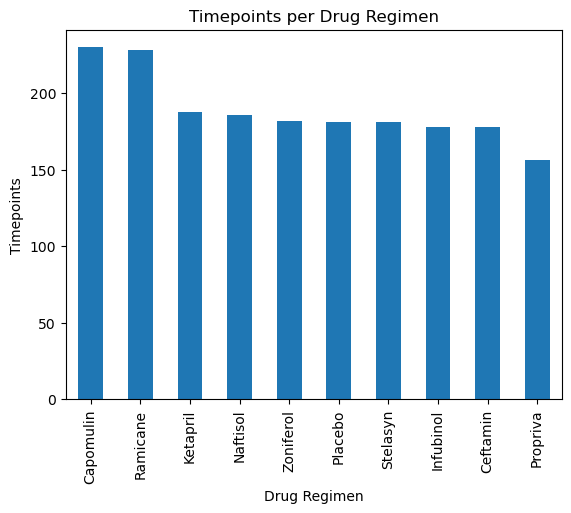

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg=duplicates_removed["Drug Regimen"].value_counts()
drug_reg

drug_reg.plot(kind="bar")


plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

plt.show()

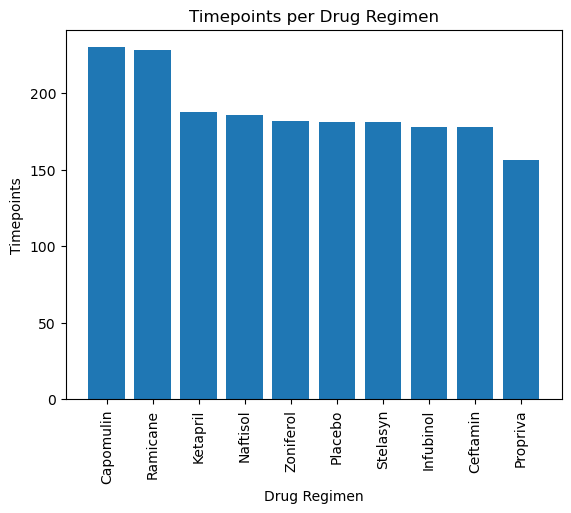

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_reg=duplicates_removed["Drug Regimen"].value_counts()


plt.bar(drug_reg.index.values,drug_reg.values)


plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Timepoints")

plt.show()


Male      958
Female    930
Name: Sex, dtype: int64


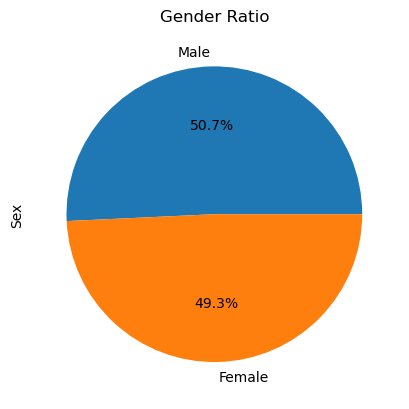

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=duplicates_removed["Sex"].value_counts()
print(gender)

gender.plot(kind="pie",autopct='%1.1f%%')
plt.title("Gender Ratio")
plt.show()

Male      958
Female    930
Name: Sex, dtype: int64


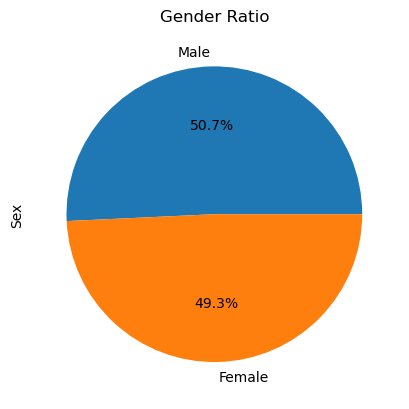

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=duplicates_removed["Sex"].value_counts()
print(gender)

# Create pie plot & labels
plt.title("Gender Ratio")
plt.ylabel("Sex")
plt.pie(gender.values, labels=gender.index.values, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = duplicates_removed.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
# max_tumor

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_merged = max_tumor.merge(duplicates_removed,on=['Mouse ID','Timepoint'],how="left")
tumor_vol_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = tumor_vol_merged.loc[tumor_vol_merged["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append('dataframe youb just calculate')
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
    # print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    # print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
    # print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # print(f"Values below {lower_bound} could be outliers.")
    # print(f"Values above {upper_bound} could be outliers.")
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels=treatment, flierprops=orange_out)
plt.set_title('Distribution of Tumor Volume by Treatments Regimen')
plt.set_xlabel('Treatments Regimen')
plt.set_ylabel('Tumor Volume (mm3)')

plt.show()


NameError: name 'treatment' is not defined

## Line and Scatter Plots

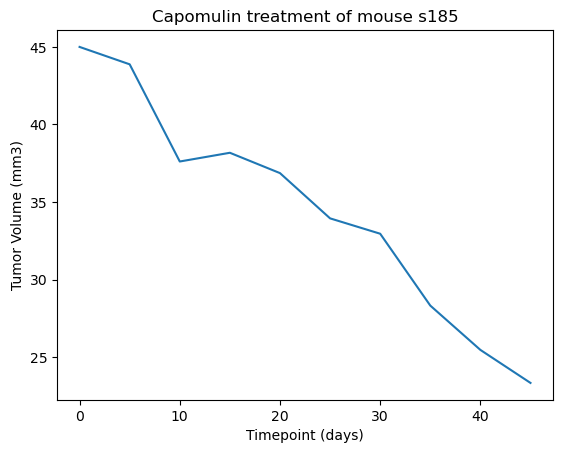

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = duplicates_removed.loc[duplicates_removed['Drug Regimen'] == "Capomulin"]


mousedata = capomulin_mice.loc[capomulin_mice['Mouse ID']== 's185']

plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse s185')
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_9792\1325927954.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()


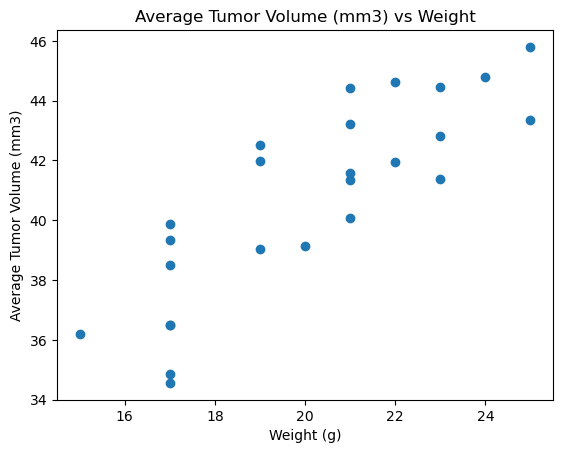

In [46]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = duplicates_removed.loc[duplicates_removed['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs Weight')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


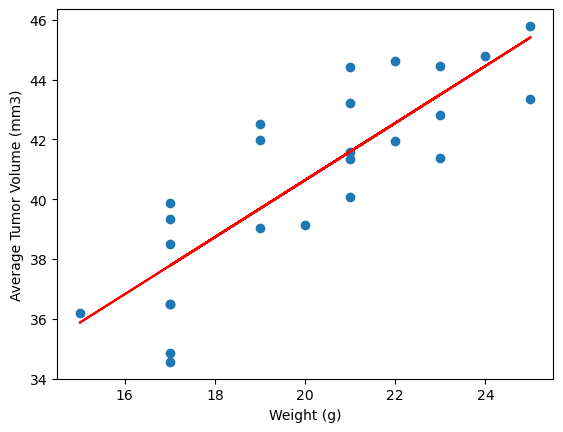

In [45]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()